# Visualizing data with python

**Author:** Ties de Kok ([Personal Website](http://www.tiesdekok.com))  
**Last updated:** 18 May 2018  
**Python version:** Python 3.6  
**License:** MIT License  

**Note:** Some features (like the ToC) will only work if you run it locally, use Binder, or use nbviewer by clicking this link: 
https://nbviewer.jupyter.org/github/TiesdeKok/LearnPythonforResearch/blob/master/3_visualizing_data.ipynb

# *Introduction*

There are many ways to create data visualizations in Python. Too many to cover in this notebook, so I will show the packages that I like to use.

A basic distinction can be made between packages that use `matplotlib` in the background and packages that do not. 

# *Table of Contents* <a id='toc'></a>

* [Quick visualizations using Pandas](#pandas)   
* [Make visualizations using the Seaborn package](#seaborn)
* [Interactive visualizations with Bokeh](#bokeh)   

## Imports

**Note:** If we want our visualizations to appear in the notebook we need to add this to the beginning of our notebook:

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


As a starting point we will use data that is stored as a Pandas dataframe/series or a Numpy array.

In [2]:
import pandas as pd
import numpy as np

Most packages use matplotlib in the background so it is usually worth it to import that as well

In [3]:
import matplotlib.pyplot as plt

For convenience we also import `join` to easily create paths:

In [4]:
import os
from os.path import join

### Parameters

In [5]:
data_path = join(os.getcwd(), 'example_data')

### Load some example data

For details on opening files such as Excel, CSV, Stata, SAS, HDF see the `1_opening_files` notebook.

In [6]:
df_auto = pd.read_csv(join(data_path, 'auto_df.csv'), sep=';', index_col='Unnamed: 0')

## <span style="text-decoration: underline;">Quick visualizations using Pandas and Matplotlib</span><a id='pandas'></a> [(to top)](#toc)

http://pandas.pydata.org/pandas-docs/stable/visualization.html  

Pandas already comes with additional functionality to turn data in a DataFrame into a `matplotlib` visualization.

You can create great visualizations using these basic functions, but it does require you to transform the data to the direct input for a graph yourself. 

The `Seaborn` package is sometimes easier as it can take care of some of this transforming for you. 

### Bar plot

http://pandas.pydata.org/pandas-docs/stable/visualization.html#bar-plots

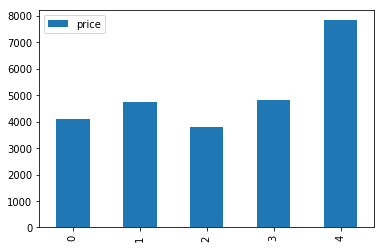

In [7]:
df_auto.iloc[0:5][['price']].plot.bar()

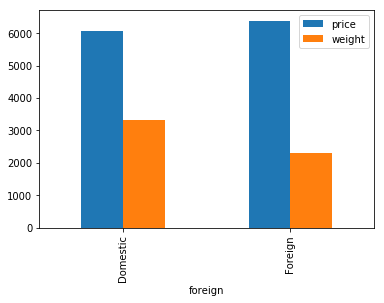

In [8]:
df_auto.groupby(['foreign']).mean()[['price', 'weight']].plot.bar()

### Histogram

http://pandas.pydata.org/pandas-docs/stable/visualization.html#histograms

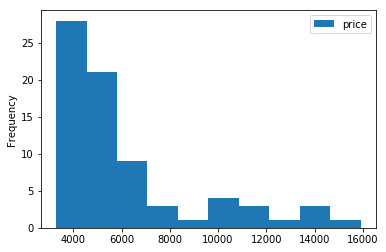

In [9]:
df_auto[['price']].plot.hist()

### Box plots

http://pandas.pydata.org/pandas-docs/stable/visualization.html#box-plots

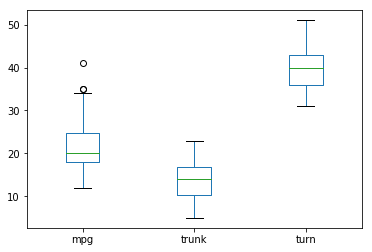

In [10]:
df_auto[['mpg', 'trunk', 'turn']].plot.box()

### Scatter plot

http://pandas.pydata.org/pandas-docs/stable/visualization.html#scatter-plot

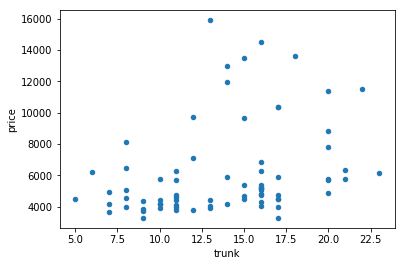

In [11]:
df_auto.plot.scatter(x='trunk', y='price')

### Pie plot

http://pandas.pydata.org/pandas-docs/stable/visualization.html#pie-plot

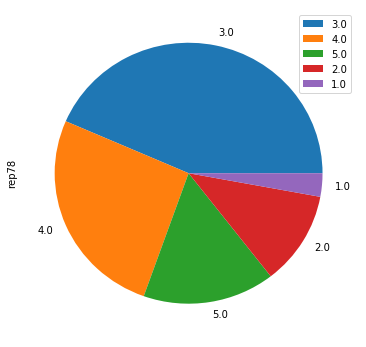

In [12]:
df_auto['rep78'].value_counts().plot.pie(figsize=(6, 6), legend=True)

### Create a visualization on a random series (from docs)

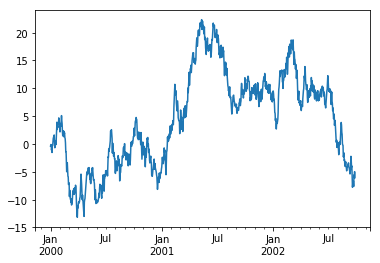

In [13]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot()

## <span style="text-decoration: underline;">Make visualizations using the `Seaborn` package</span><a id='seaborn'></a> [(to top)](#toc)

`Seaborn` is a really awesome package to create visualizations for Pandas dataframes:  
> https://seaborn.pydata.org/index.html

If you use a recent version of the Anaconda distribution then it comes pre-installed with `seaborn`.  If you have an older version of Anaconda you might have to install it using:
 >`pip install seaborn`  

The main benefit of Seaborn is that it takes care of some of the transformation steps for you. Plus it has some additional features to make your graphs more aesthetically pleasing. 

In [14]:
import seaborn as sns

## Change the look of your Seaborn visualizations

### Set the style

Seaborn comes with a variety of build-in themes: `darkgrid`, `whitegrid`, `dark`, `white`, and `ticks`.  
https://seaborn.pydata.org/tutorial/aesthetics.html#seaborn-figure-styles

This function (from the documentation) creates some random data to show the different styles:

In [15]:
def sinplot(flip=1):
    x = np.linspace(0, 14, 100)
    for i in range(1, 7):
        plt.plot(x, np.sin(x + i * .5) * (7 - i) * flip)

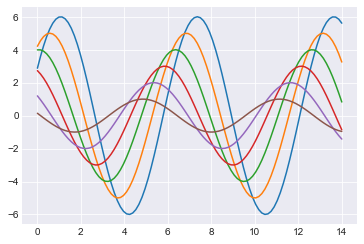

In [16]:
sns.set_style("darkgrid")
sinplot()

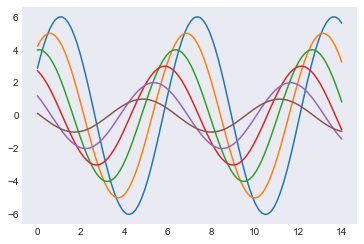

In [17]:
sns.set_style("dark")
sinplot()

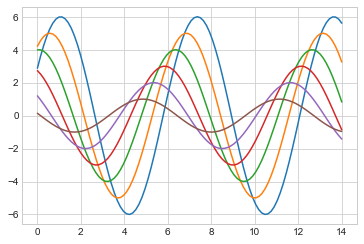

In [18]:
sns.set_style("whitegrid")
sinplot()

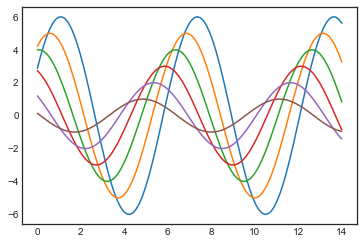

In [19]:
sns.set_style("white")
sinplot()

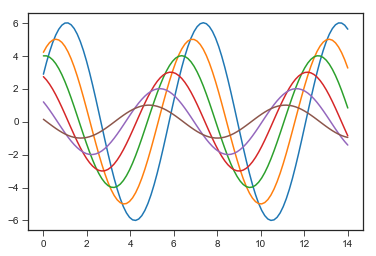

In [20]:
sns.set_style("ticks")
sinplot()

It is also possible to remove the 'spine' by using `sns.despine()`:

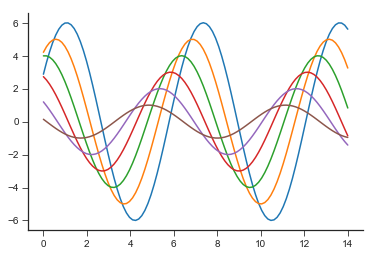

In [21]:
sinplot()
sns.despine()

### Set the colors

Colors can make a big difference when it comes to the appearance of a visual.  See the details here:  
https://seaborn.pydata.org/tutorial/color_palettes.html

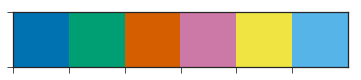

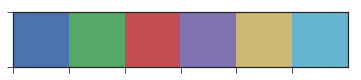

In [22]:
colorblind_palette = sns.color_palette('colorblind')
deep_palette = sns.color_palette('deep')

sns.palplot(colorblind_palette)
sns.palplot(deep_palette)

You can pass these color palettes to your plotting function. 

## Several Seaborn examples

### Histogram

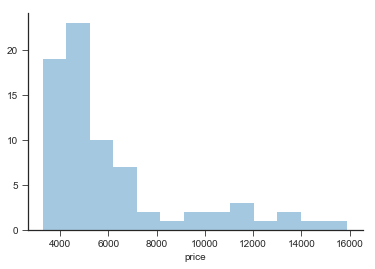

In [23]:
sns.distplot(df_auto['price'], kde=False)
sns.despine()

### Scatterplot

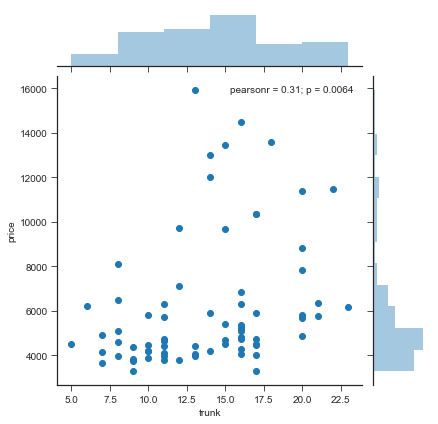

In [24]:
sns.jointplot(x="trunk", y="price", data=df_auto)

### Pairwise correlations

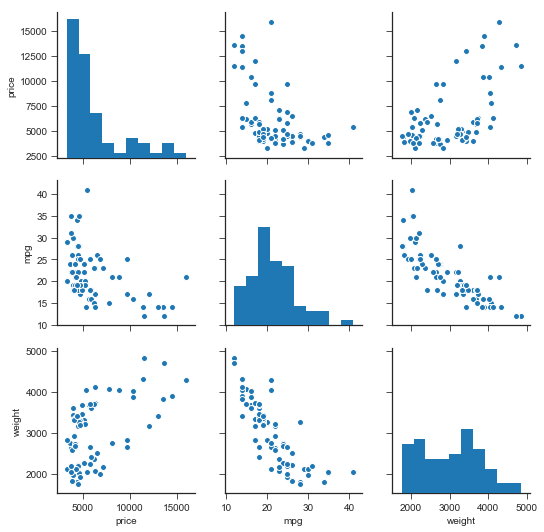

In [25]:
sns.pairplot(df_auto[['price', 'mpg', 'weight']])

### Plotting categorical data

Let's create some categorical columns:

In [26]:
df_auto['brand'] = [x.split(" ")[0] for x in df_auto['make']]
df_auto['headroom'] = ['big' if x > 2.5 else 'small' for x in df_auto['headroom']]
df_auto['weight_cat'] = pd.qcut(df_auto['weight'].values, 12, labels=range(0,12))

In [27]:
df_auto.head()

,make,price,mpg,rep78,headroom,trunk,weight,length,turn,displacement,gear_ratio,foreign,brand,weight_cat
0,AMC Concord,4099,22,3.0,small,11,2930,186,40,121,3.58,Domestic,AMC,5
1,AMC Pacer,4749,17,3.0,big,11,3350,173,40,258,2.53,Domestic,AMC,7
2,AMC Spirit,3799,22,NaN,big,12,2640,168,35,121,3.08,Domestic,AMC,3
3,Buick Century,4816,20,3.0,big,16,3250,196,40,196,2.93,Domestic,Buick,6
4,Buick Electra,7827,15,4.0,big,20,4080,222,43,350,2.41,Domestic,Buick,11


### Bar plot

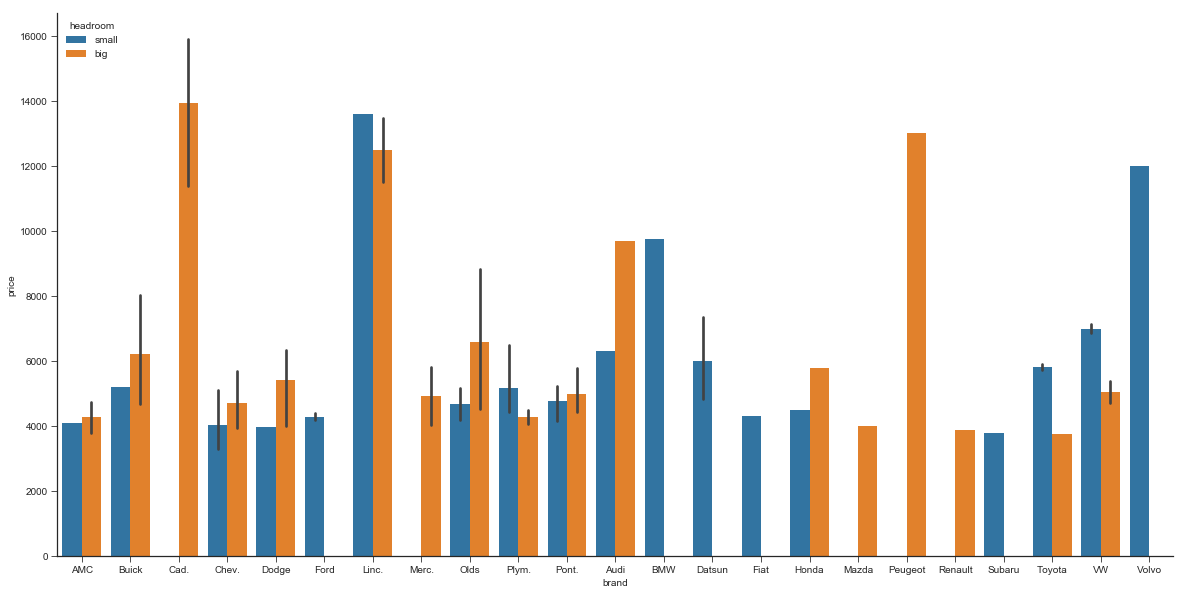

In [28]:
plt.figure(figsize=(20,10))
sns.barplot(x="brand", y="price", hue="headroom", data=df_auto)
sns.despine()

*Note:* we could pass our colorblind palette to this plot for example:

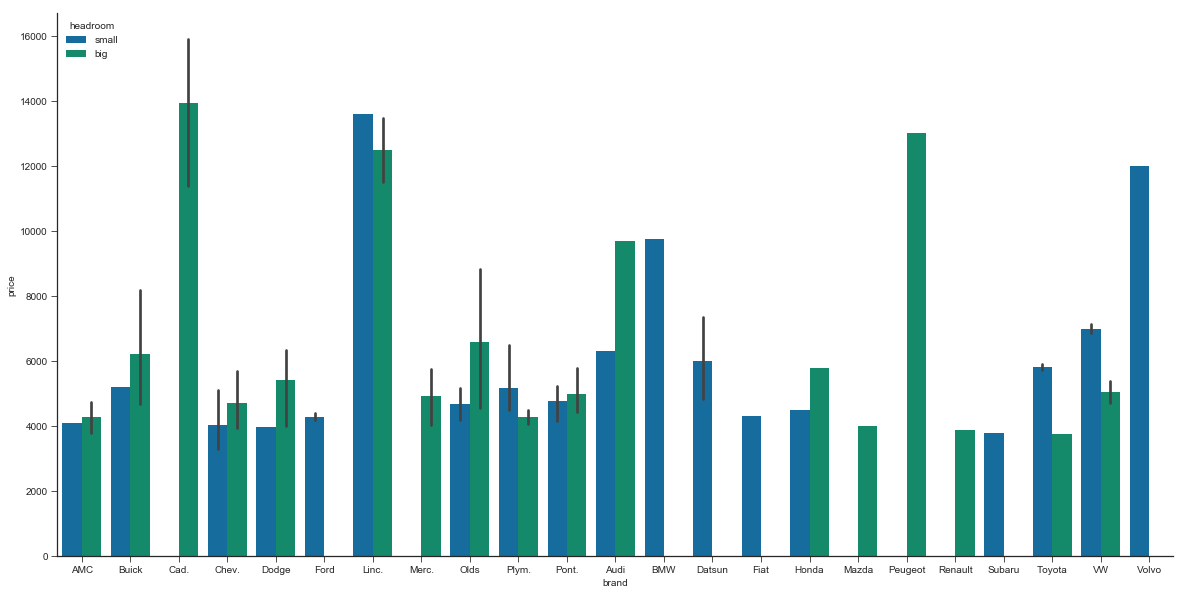

In [29]:
plt.figure(figsize=(20,10))
sns.barplot(x="brand", y="price", hue="headroom", data=df_auto, palette=colorblind_palette)
sns.despine()

### Count plot

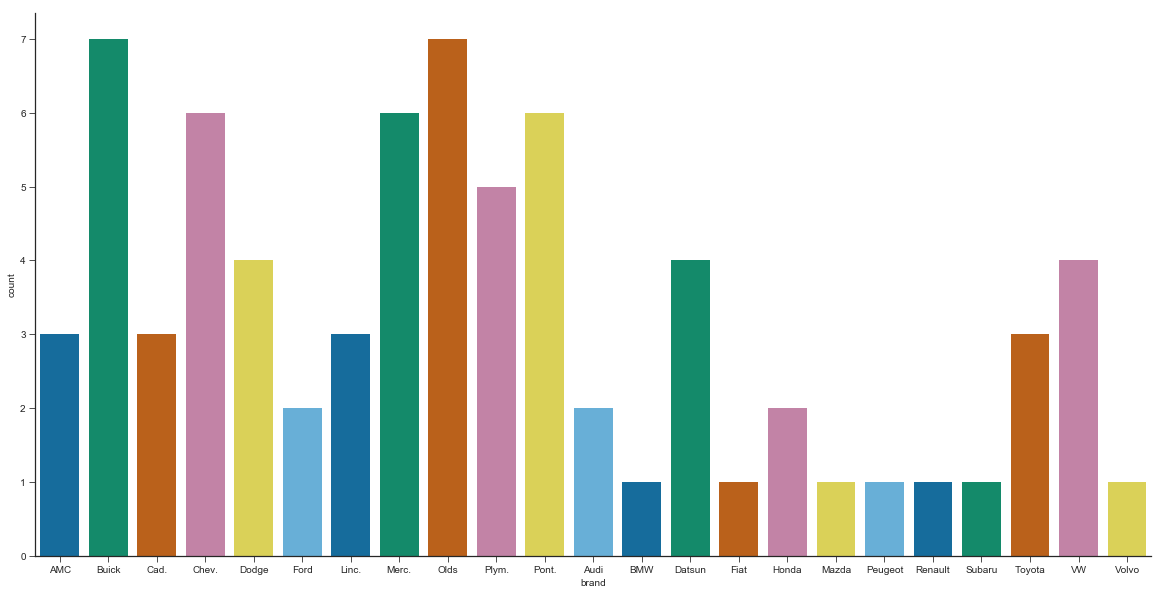

In [30]:
plt.figure(figsize=(20,10))
sns.countplot(x="brand", data=df_auto, palette=colorblind_palette)
sns.despine()

### Point plot

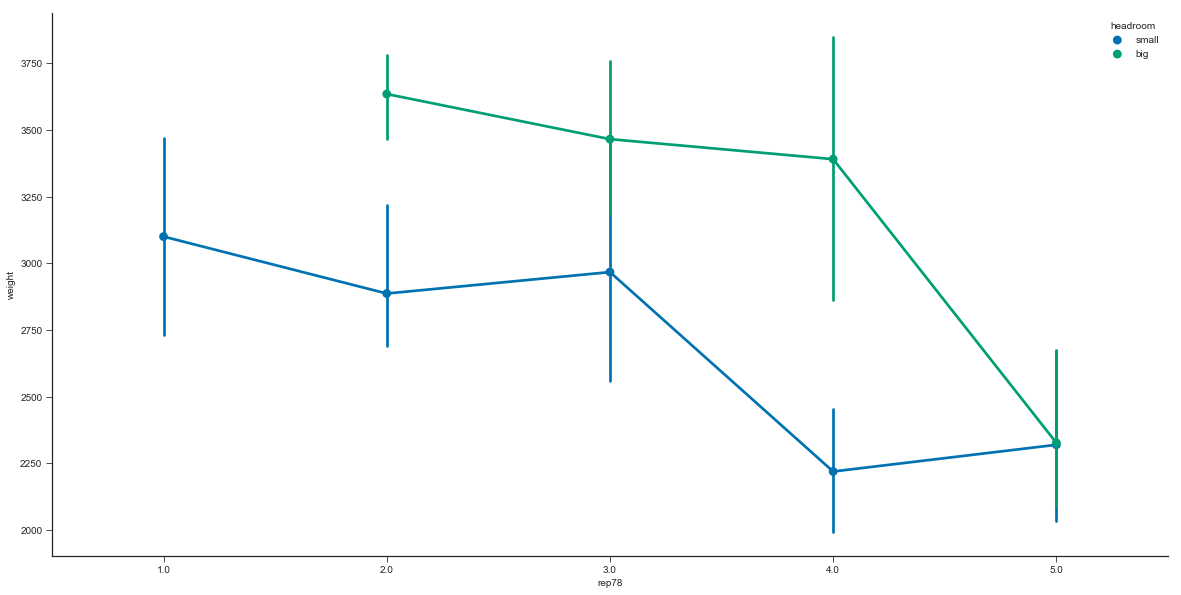

In [31]:
plt.figure(figsize=(20,10))
sns.pointplot(x="rep78", y="weight", hue='headroom',data=df_auto, palette=colorblind_palette)
sns.despine()

## Seaborn Grids

A powerful feature of `Seaborn` is the ability to create a grid of visualization with multiple graphs.  
https://seaborn.pydata.org/tutorial/axis_grids.html

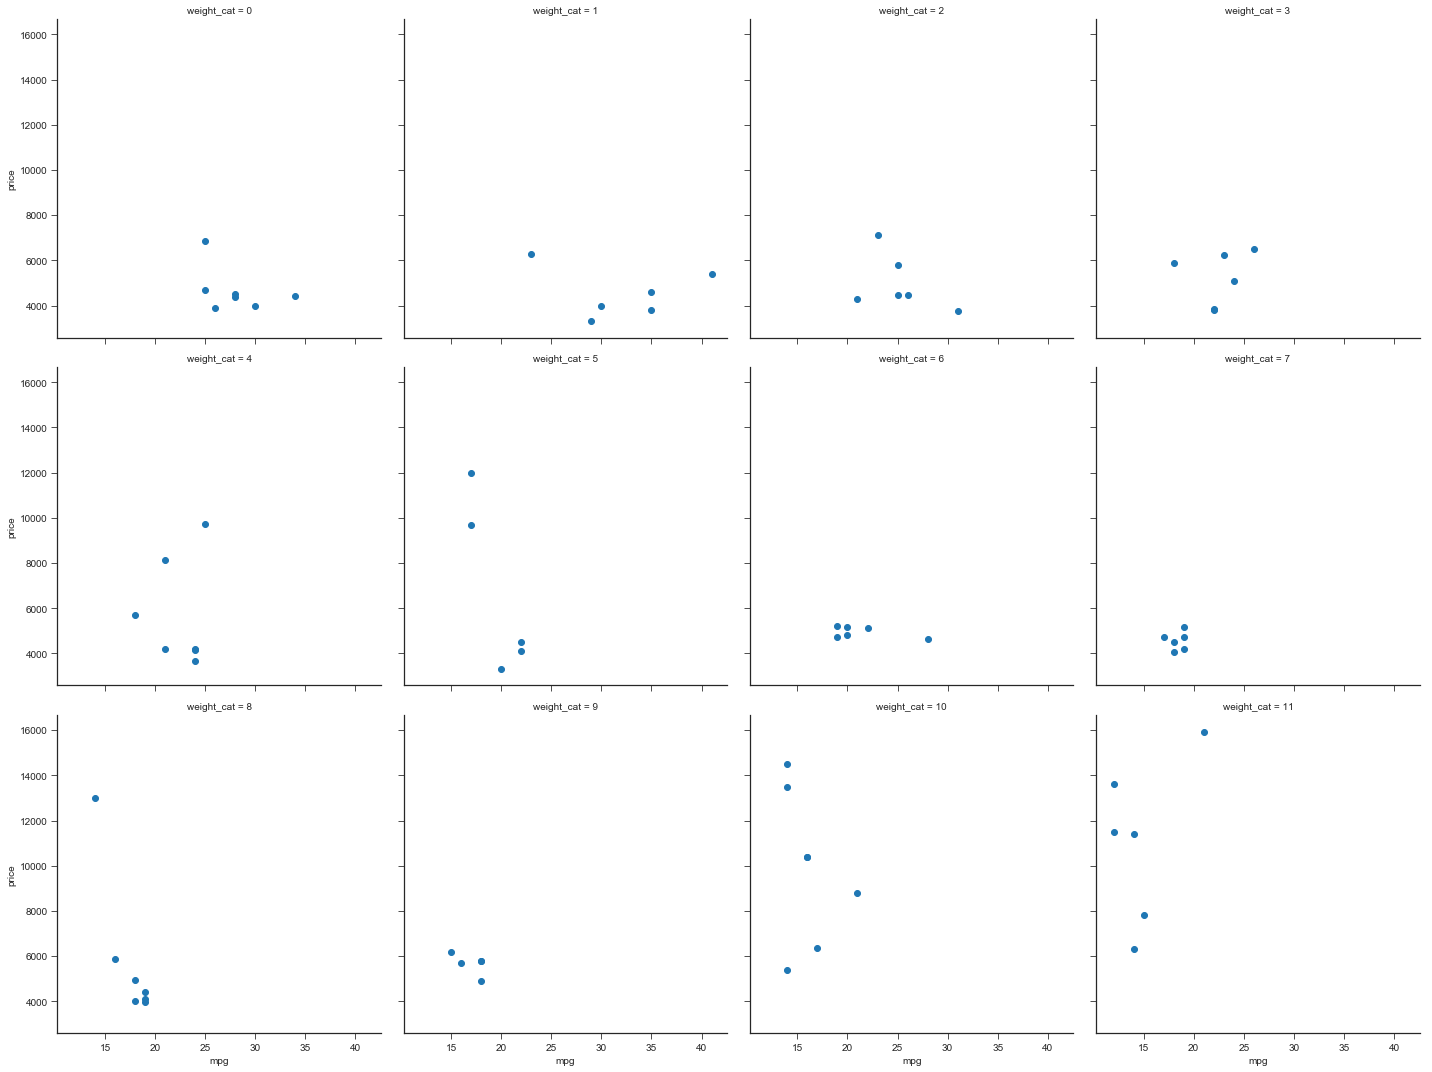

In [32]:
g = sns.FacetGrid(df_auto, col="weight_cat", col_wrap=4, size=5)
g.map(plt.scatter,"mpg", "price")

## <span style="text-decoration: underline;">Interactive visualizations with `Bokeh`</span><a id='bokeh'></a> [(to top)](#toc)

A cool library to create interactive visualizations from Pandas DataFrames is `Bokeh`: http://bokeh.pydata.org/en/latest/

Installation is best using: `conda install bokeh`  

For the extensive documentation see: http://bokeh.pydata.org/en/0.11.0/docs/user_guide/charts.html#making-high-level-charts

**Note:** These graphs will not show on GitHub. Some plots will show if you show them via `nbviewer`:  
https://nbviewer.jupyter.org/github/TiesdeKok/PythonAccountingResearch/blob/master/3_visualizing_data.ipynb

In [33]:
from bokeh.io import output_notebook
from bokeh.plotting import figure, show

In [34]:
output_notebook()

Loading BokehJS ...

## Some examples

**Note:** recently the syntax of Bokeh changed pretty strongly so make sure to use the latest version and the latest documentation!

### Bar chart

In [35]:
p = figure(plot_width=600, plot_height=400, title="Average MPG by Weight")
p.vbar(x='weight_cat', top='mpg', width=0.5, source=df_auto)
p.yaxis.axis_label = 'Average mpg'
p.xaxis.axis_label = 'Weight category'
show(p)

### Simple scatter plot

In [36]:
p = figure(plot_width=600, plot_height=400, title="Length vs Trunk")
p.scatter(source=df_auto, x='trunk', y='length', size=10)
p.xaxis.axis_label = 'Trunk size'
p.yaxis.axis_label = 'Car length'
show(p)

### Scatter plot where you can hover over a dot for details

In [37]:
from bokeh.models import HoverTool

hover = HoverTool(tooltips=[
    ("Na,e", "@make"),
    ("(x,y)", "($x, $y)"),
    ("Origin:", "@foreign"),
])

In [38]:
p = figure(plot_width=600, plot_height=400, title="Length vs Trunk", tools=[hover])
p.scatter(source=df_auto, x='trunk', y='length', size=10)
p.xaxis.axis_label = 'Trunk size'
p.yaxis.axis_label = 'Car length'
show(p)

## Add interactive components to the `Bokeh` figure

The example below is just a fun example to show cool things you can do when you combine the Juputer Notebook with `ipywidgets` and `bokeh`.  

If you like to "hack" around then `ipywidgets` is a great way to pass the time, but otherwise I don't usually recommend it as it is not very user-friendly.

### Show scatter plot for one brand, with a dropdown menu to change the brand

In [39]:
from ipywidgets import interact

In [40]:
def create_plot(brand='AMC'):
    data_df = df_auto[df_auto.brand == brand]
    p = figure(plot_width=600, plot_height=400, title="Length vs Trunk")
    p.xaxis.axis_label = 'Trunk size'
    p.yaxis.axis_label = 'Car length'
    p.scatter(source=data_df, x='trunk', y='length', size=10)
    show(p)

We only want to include brands with more than 1 car model:

In [41]:
brand_list = list(df_auto.groupby('brand').filter(lambda x: len(x) > 1).brand.unique())

Show the plot with the interactive dropdown menu:

In [42]:
interact(create_plot, brand=brand_list)

interactive(children=(Dropdown(description='brand', options=('AMC', 'Buick', 'Cad.', 'Chev.', 'Dodge', 'Ford', 'Linc.', 'Merc.', 'Olds', 'Plym.', 'Pont.', 'Audi', 'Datsun', 'Honda', 'Toyota', 'VW'), value='AMC'), Output()), _dom_classes=('widget-interact',))

<function __main__.create_plot>